# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


2024-01-31 09:31:41.030835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Epoch [0][20]	 Batch [0][550]	 Training Loss 368.6818	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 137.2932	 Accuracy 0.0480
Epoch [0][20]	 Batch [100][550]	 Training Loss 119.0823	 Accuracy 0.0640
Epoch [0][20]	 Batch [150][550]	 Training Loss 112.5177	 Accuracy 0.0783
Epoch [0][20]	 Batch [200][550]	 Training Loss 109.1723	 Accuracy 0.0850
Epoch [0][20]	 Batch [250][550]	 Training Loss 107.1205	 Accuracy 0.0909
Epoch [0][20]	 Batch [300][550]	 Training Loss 105.7159	 Accuracy 0.0960
Epoch [0][20]	 Batch [350][550]	 Training Loss 104.6523	 Accuracy 0.1005
Epoch [0][20]	 Batch [400][550]	 Training Loss 103.8066	 Accuracy 0.1054
Epoch [0][20]	 Batch [450][550]	 Training Loss 103.1492	 Accuracy 0.1097
Epoch [0][20]	 Batch [500][550]	 Training Loss 102.5870	 Accuracy 0.1140

Epoch [0]	 Average training loss 102.0592	 Average training accuracy 0.1192
Epoch [0]	 Average validation loss 96.4308	 Average validation accuracy 0.1728

Epoch [1][20]	 Batch [0][550]	 Training Los

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.4861.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 160.5897	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 132.2629	 Accuracy 0.0557
Epoch [0][20]	 Batch [100][550]	 Training Loss 121.4953	 Accuracy 0.0638
Epoch [0][20]	 Batch [150][550]	 Training Loss 116.3492	 Accuracy 0.0684
Epoch [0][20]	 Batch [200][550]	 Training Loss 113.2768	 Accuracy 0.0740
Epoch [0][20]	 Batch [250][550]	 Training Loss 110.8603	 Accuracy 0.0814
Epoch [0][20]	 Batch [300][550]	 Training Loss 109.0362	 Accuracy 0.0894
Epoch [0][20]	 Batch [350][550]	 Training Loss 107.4288	 Accuracy 0.0974
Epoch [0][20]	 Batch [400][550]	 Training Loss 106.1282	 Accuracy 0.1041
Epoch [0][20]	 Batch [450][550]	 Training Loss 105.0978	 Accuracy 0.1104
Epoch [0][20]	 Batch [500][550]	 Training Loss 104.0827	 Accuracy 0.1168

Epoch [0]	 Average training loss 103.2472	 Average training accuracy 0.1227
Epoch [0]	 Average validation loss 95.2321	 Average validation accuracy 0.1708

Epoch [1][20]	 Batch [0][550]	 Training Los

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6619.



## 绘制曲线

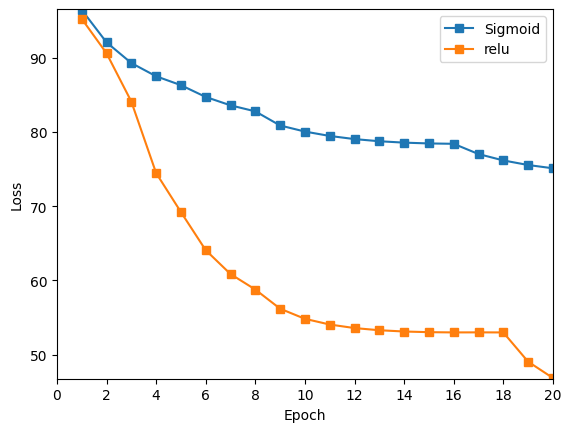

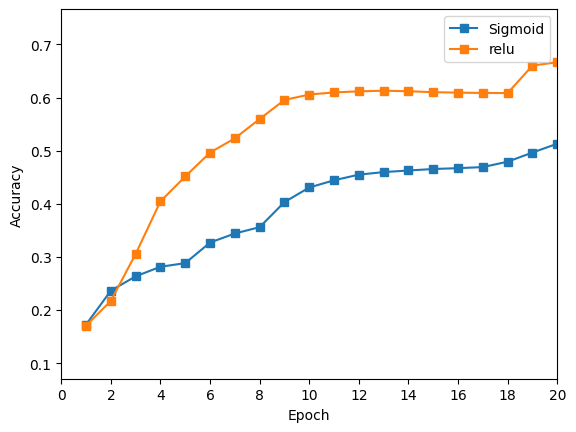

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.8026	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.0440	 Accuracy 0.3045
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.7912	 Accuracy 0.3984
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.6282	 Accuracy 0.4479
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.6222	 Accuracy 0.4805
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.4246	 Accuracy 0.5055
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.4676	 Accuracy 0.5248
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.3270	 Accuracy 0.5381
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.1686	 Accuracy 0.5485
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.3009	 Accuracy 0.5588
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2525	 Accuracy 0.5654

Epoch [0]	 Average training loss 1.3625	 Average training accuracy 0.5715
Epoch [0]	 Average validation loss 1.3625	 Average validation accuracy 0.6496

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.2030	 Accuracy 0.6200

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...


The test accuracy is 0.6740.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.3006	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.7019	 Accuracy 0.6929
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.7185	 Accuracy 0.7516
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.4806	 Accuracy 0.7701
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.7002	 Accuracy 0.7843
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.4647	 Accuracy 0.7938
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.6053	 Accuracy 0.8002
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4394	 Accuracy 0.8056
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.4304	 Accuracy 0.8105
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.6599	 Accuracy 0.8142
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.4545	 Accuracy 0.8169

Epoch [0]	 Average training loss 0.4885	 Average training accuracy 0.8194
Epoch [0]	 Average validation loss 0.4885	 Average validation accuracy 0.8638

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.3208	 Accuracy 0.9100

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9755.



## 绘制曲线

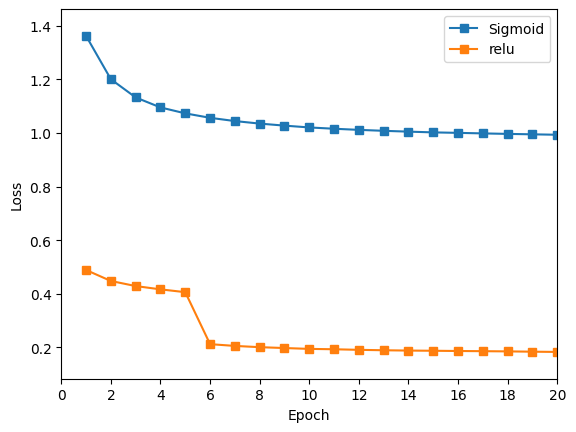

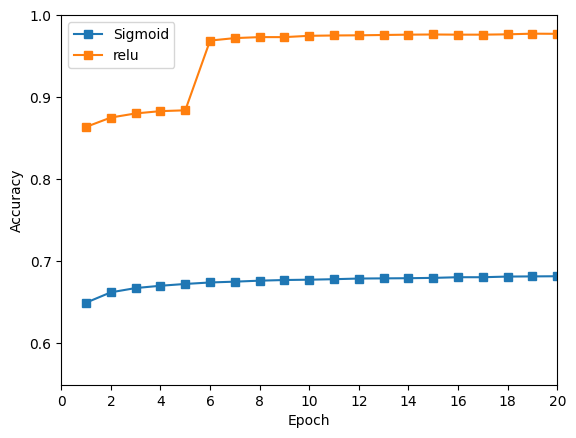

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [22]:
from criterion import SoftmaxCrossEntropyLossLayer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

ReLUSigMLP = Network()
ReLUSigMLP.add(FCLayer(784, 128))
ReLUSigMLP.add(ReLULayer())
ReLUSigMLP.add(FCLayer(128, 128))
ReLUSigMLP.add(SigmoidLayer())
ReLUSigMLP.add(FCLayer(128, 10))
ReLUSigMLP, ReLUSig_loss, ReLUSig_acc = train(ReLUSigMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(ReLUSigMLP, criterion, data_test, batch_size, disp_freq)


Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6837	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.1051	 Accuracy 0.2545
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8590	 Accuracy 0.3617
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.6229	 Accuracy 0.4148
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.5894	 Accuracy 0.4485
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.3508	 Accuracy 0.4735
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.4574	 Accuracy 0.4931
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.2697	 Accuracy 0.5068
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.3207	 Accuracy 0.5191
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.2508	 Accuracy 0.5296
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.1296	 Accuracy 0.5378

Epoch [0]	 Average training loss 1.1253	 Average training accuracy 0.5464
Epoch [0]	 Average validation loss 1.1253	 Average validation accuracy 0.6608

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.1299	 Accuracy 0.6500

In [26]:
from criterion import SoftmaxCrossEntropyLossLayer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

SigReLUMLP = Network()
SigReLUMLP.add(FCLayer(784, 128))
SigReLUMLP.add(ReLULayer())
SigReLUMLP.add(FCLayer(128, 128))
SigReLUMLP.add(SigmoidLayer())
SigReLUMLP.add(FCLayer(128, 10))
SigReLUMLP, SigReLU_loss, SigReLU_acc = train(SigReLUMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(SigReLUMLP, criterion, data_test, batch_size, disp_freq)


Epoch [0][20]	 Batch [0][550]	 Training Loss 2.3592	 Accuracy 0.1800
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.1219	 Accuracy 0.2445
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.9652	 Accuracy 0.2814
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.8668	 Accuracy 0.3119
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.8071	 Accuracy 0.3494
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.5991	 Accuracy 0.3791
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.5980	 Accuracy 0.4030
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.4199	 Accuracy 0.4202
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.3904	 Accuracy 0.4335
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.4468	 Accuracy 0.4461
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2973	 Accuracy 0.4546

Epoch [0]	 Average training loss 1.3699	 Average training accuracy 0.4626
Epoch [0]	 Average validation loss 1.3699	 Average validation accuracy 0.5552

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.3243	 Accuracy 0.5500

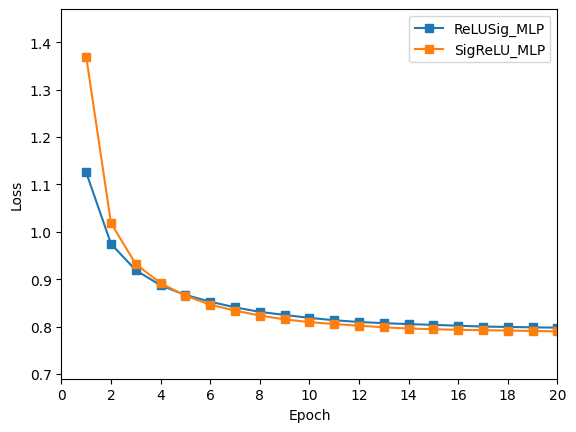

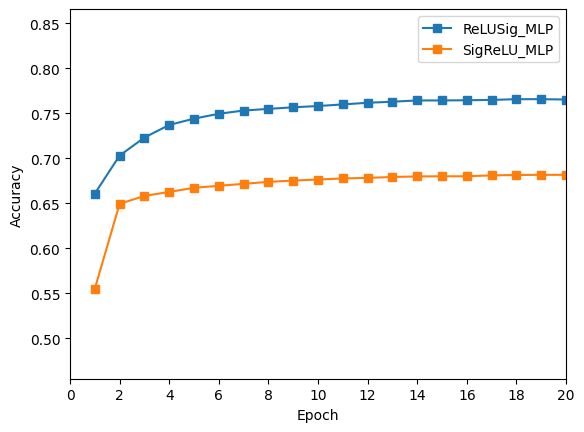

In [28]:
plot_loss_and_acc({'ReLUSig_MLP': [ReLUSig_loss, ReLUSig_acc],
                   'SigReLU_MLP': [SigReLU_loss, SigReLU_acc]})